In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
root = "/content/drive/MyDrive/Capstone - Albemarle County Public Schools/Data/"
sample_data_path = os.path.join(root, "sample_data_deidentified.xlsx")

math_df = pd.read_excel(sample_data_path, "Math 6-8")
read_df = pd.read_excel(sample_data_path, "Reading 6-8")

In [17]:
math_df["Type of Certification"] = math_df["Type of Certification"].fillna("NO")
read_df["Type of Certification"] = read_df["Type of Certification"].fillna("NO")

In [18]:
math_df.head(n=5)

,Grade,Test Name,Certified Teacher,Type of Certification,Year of Certification,Growth,Expected Achievement,Actual Achievement,Vertical Scaled Score
0,8th Grade,Gr 8 Mathematics (2016) CAT,N,NO,NaN,-1.334740,394.334740,393,1545
1,8th Grade,Gr 8 Mathematics (2016) CAT,N,NO,NaN,NaN,NaN,321,1469
2,8th Grade,Gr 8 Mathematics (2016) CAT,N,NO,NaN,NaN,NaN,419,1571
3,8th Grade,Gr 8 Mathematics (2016) CAT,N,NO,NaN,3.149417,313.850583,317,1463
4,8th Grade,Gr 8 Mathematics (2016) CAT,N,NO,NaN,85.981716,298.018284,384,1493


In [19]:
read_df.head(n=5)

,Grade,Test Name,Certified Teacher,Type of Certification,Year of Certification,Growth,Expected Achievement,Actual Achievement,Vertical Scaled Score
0,8th Grade,Gr 8 Reading (2017) CAT,N,NO,NaN,68.868100,339.131900,408,1617
1,8th Grade,Gr 8 Reading (2017) CAT,N,NO,NaN,104.475810,267.524190,372,1552
2,8th Grade,Gr 8 Reading (2017) CAT,N,NO,NaN,25.459206,374.540794,400,1600
3,8th Grade,Gr 8 Reading (2017) CAT,N,NO,NaN,-10.995747,371.995747,361,1555
4,8th Grade,Gr 8 Reading (2017) CAT,N,NO,NaN,45.422226,371.577774,417,1650


## Breakdown of certified teachers

In [20]:
cert_count_math = math_df['Certified Teacher'].value_counts()
cert_count_math = cert_count_math.to_list()
print(f"certified teachers for math: N - {cert_count_math[0]}, Y - {cert_count_math[1]}")

cert_count_read = read_df['Certified Teacher'].value_counts()
cert_count_read = cert_count_read.to_list()
print(f"certified teachers for reading: N - {cert_count_read[0]}, Y - {cert_count_read[1]}")

certified teachers for math: N - 2542, Y - 310
certified teachers for reading: N - 2261, Y - 561


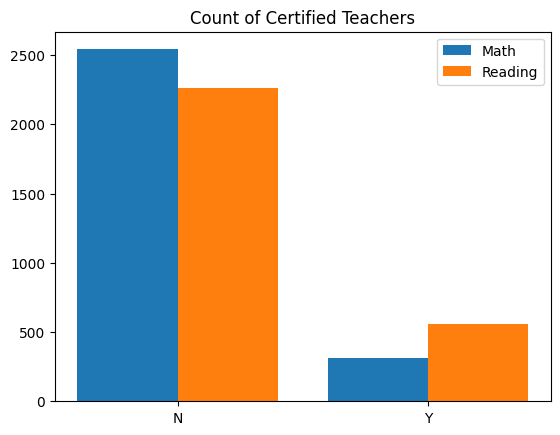

In [21]:
xlab = ['N', 'Y']
x = np.arange(len(xlab))
width = 0.4

plt.bar(x - 0.2, cert_count_math, width);
plt.bar(x + 0.2, cert_count_read, width);
plt.title("Count of Certified Teachers");
plt.xticks(x, xlab);
plt.legend(["Math", "Reading"]);

There are many more teachers that aren't certified than certified ones for both math and reading. We should take this into consideration when analyzing the data.

## Breakdown of type of certification

In [25]:
type_cert_count_math = math_df['Type of Certification'].value_counts() # does not count NA
type_cert_count_math = type_cert_count_math.to_list()
# type_cert_count_math.append(len(math_df['Type of Certification']) - np.sum(type_cert_count_math))
print(f"certified teachers for math: NO - {type_cert_count_math[0]}, FULL - {type_cert_count_math[1]}, MICRO - {type_cert_count_math[2]}")

type_cert_count_read = read_df['Type of Certification'].value_counts() # does not count NA
type_cert_count_read = type_cert_count_read.to_list()
# type_cert_count_read.append(len(read_df['Certified Teacher']) - np.sum(type_cert_count_read))
type_cert_count_read[:] = [type_cert_count_read[i] for i in [0, 2, 1]]
print(f"certified teachers for reading: NO - {type_cert_count_read[0]}, FULL - {type_cert_count_read[1]}, MICRO - {type_cert_count_read[2]}")

certified teachers for math: NO - 2542, FULL - 163, MICRO - 147
certified teachers for reading: NO - 2261, FULL - 278, MICRO - 283


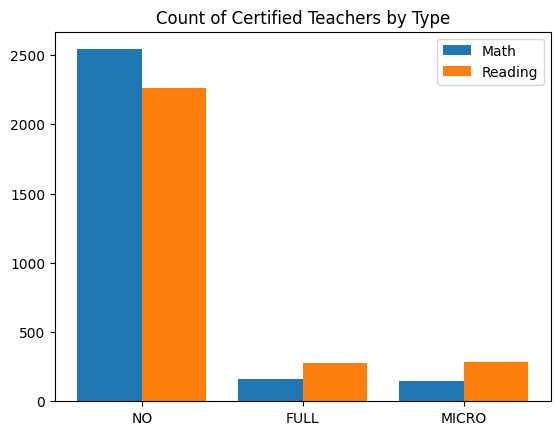

In [27]:
xlab = ['NO', 'FULL', 'MICRO']
x = np.arange(len(xlab))
width = 0.4

plt.bar(x - 0.2, type_cert_count_math, width);
plt.bar(x + 0.2, type_cert_count_read, width);
plt.title("Count of Certified Teachers by Type");
plt.xticks(x, xlab);
plt.legend(["Math", "Reading"]);

The amount of FULL and MICRO certified teachers are the same, and are heavily outweighed by the number of teachers that are not certified.

# Compare growth of student between certified and non-certified teachers

In [28]:
math_df_growth = math_df[["Type of Certification", "Growth"]].dropna()
math_df_growth.head(n=5)

,Type of Certification,Growth
0,NO,-1.334740
3,NO,3.149417
4,NO,85.981716
5,NO,-6.658970
6,NO,-34.526420


Text(0.5, 1.0, "Teacher's Type of Certification with Student's Growth for Math")

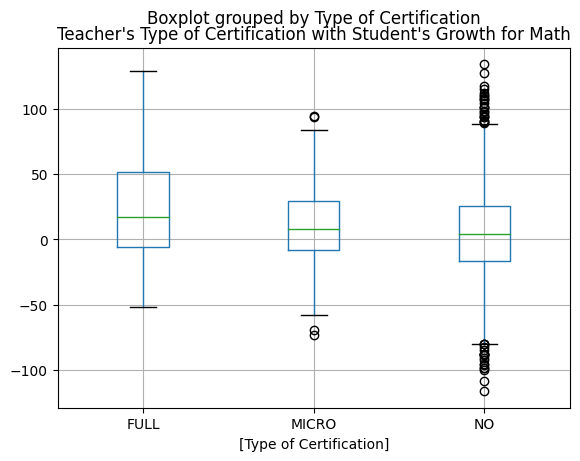

In [31]:
math_df_growth.boxplot(by="Type of Certification");
plt.title("Teacher's Type of Certification with Student's Growth for Math");

In [32]:
read_df_growth = read_df[["Type of Certification", "Growth"]].dropna()
read_df_growth.head(n=5)

,Type of Certification,Growth
0,NO,68.868100
1,NO,104.475810
2,NO,25.459206
3,NO,-10.995747
4,NO,45.422226


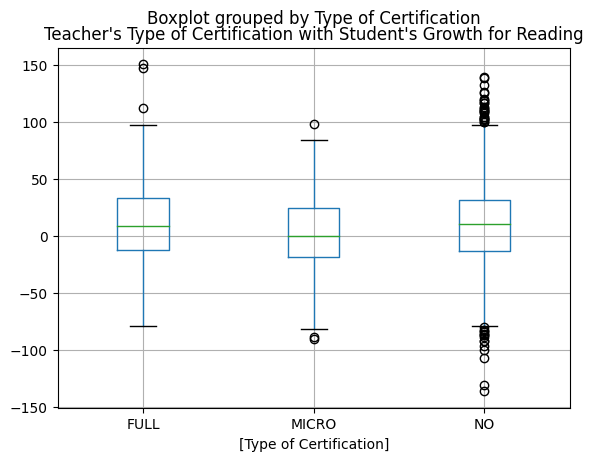

In [33]:
read_df_growth.boxplot(by="Type of Certification");
plt.title("Teacher's Type of Certification with Student's Growth for Reading");

The boxplots for teacher's certification and the student's growth (which is defined by expected and actual) is not that different between certified and non certified teachers.